## Classification of movie reviews

This NLP project is aim to build different classifiers for movie review datasets:

1. Binary classification problem with 5331 positive and 5331 negative snippets from http://www.cs.cornell.edu/people/pabo/movie-review-data </br>
2. Multi-class problem with data from Kaggle competition - Sentiment Analysis on Movie Reviews.
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data </br>
The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset with five classes: </br>
0 - negative; 
1 - somewhat negative; 
2 - neutral; 
3 - somewhat positive; 
4 - positive;
3. Predict movie rating with moive reviews scraped from IMDb. 



### Text pre-processing

In [111]:
import numpy as np
import pandas as pd
import math
import re
import collections
import random
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectPercentile, chi2

import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
file_pos = open("data/rt-polarity-pos.txt", "r", encoding="ISO-8859-1")
data_pos = file_pos.readlines()
file_neg = open("data/rt-polarity-neg.txt", "r", encoding="ISO-8859-1")
data_neg = file_neg.readlines()
corpus = data_neg + data_pos
y = np.array([0]*5331 + [1]*5331)

In [28]:
## original dataset first 10
for i in range(20):
    print(corpus[i]) 

simplistic , silly and tedious . 

it's so laddish and juvenile , only teenage boys could possibly find it funny . 

exploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . 

[garbus] discards the potential for pathological study , exhuming instead , the skewed melodrama of the circumstantial situation . 

a visually flashy but narratively opaque and emotionally vapid exercise in style and mystification . 

the story is also as unoriginal as they come , already having been recycled more times than i'd care to count . 

about the only thing to give the movie points for is bravado -- to take an entirely stale concept and push it through the audience's meat grinder one more time . 

not so much farcical as sour . 

unfortunately the story and the actors are served with a hack script . 

all the more disquieting for its relatively gore-free allusions to the serial murders , but it falls down in its attempts t

In [99]:
## Clean text

def clean_sentence(text, rm_stopwords=True):
    """
    - Tokenize the words.
    - Remove all punctuation from words.
    - Remove all words that are not purely comprised of alphabetical characters.
    - Remove all words that are known stop words.
    - Get stem of the words
    - Remove all words that have a length <= 1 character.
    """
    
    text=text.lower()
    tokens = text.split()
    
    table = str.maketrans("","", string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    tokens = [w for w in tokens if w.isalpha()]
    
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]

    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(w) for w in tokens]
    
    tokens = [w for w in tokens if len(w) > 1]

    return tokens

clean_corpus = []
for s in corpus:
    clean_corpus.append(" ".join(clean_sentence(s)))

print(clean_corpus[:10])
print("Length of X:", len(clean_corpus))

['simplist silli tedious', 'laddish juvenil teenag boy could possibl find funni', 'exploit larg devoid depth sophist would make watch graphic treatment crime bearabl', 'garbus discard potenti patholog studi exhum instead skew melodrama circumstanti situat', 'visual flashi narrat opaqu emot vapid exercis style mystif', 'stori also unorigin come alreadi recycl time id care count', 'thing give movi point bravado take entir stale concept push audienc meat grinder one time', 'much farcic sour', 'unfortun stori actor serv hack script', 'disquiet relat gorefre allus serial murder fall attempt human subject']
Length of X: 10662


In [100]:
X = np.array(clean_corpus)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

print("No. train-test samples:", y_train.shape[0], y_test.shape[0])

No. train-test samples: 8529 2133


### Bag of words model

In [119]:
# text vectorization
vectorizer = TfidfVectorizer(max_df=0.9, decode_error='ignore', ngram_range=(1,2), stop_words="english")
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

def reduce_dim(X_train, X_test, y_train, percentile):
    selector = SelectPercentile(chi2, percentile=percentile)
    selector.fit(X_train, y_train)
    X_train_reduced = selector.transform(X_train).toarray()
    X_test_reduced = selector.transform(X_test).toarray()
    return X_train_reduced, X_test_reduced

X_train_reduced, X_test_reduced = reduce_dim(X_train_transformed, 
                                             X_test_transformed, 
                                             y_train, percentile=5)

print("After text vectorization,\ntraining set:", X_train_reduced.shape, 
      "\ntesting set:", X_test_reduced.shape)

After text vectorization,
training set: (8529, 3867) 
testing set: (2133, 3867)


In [121]:
# model
clf = GaussianNB()
clf.fit(X_train_reduced, y_train)

print("Accuracy of train set: {:.2%}".format(clf.score(X_train_reduced, y_train)))
print("Accuracy of test set: {:.2%}".format(clf.score(X_test_reduced, y_test)))

Accuracy of train set: 86.19%
Accuracy of test set: 69.76%


### Word embedding

In [4]:
vocabulary = sample

print(vocabulary[:100])
print('Data size', len(vocabulary))

['simplistic', 'silly', 'and', 'tedious', 'it', 'so', 'laddish', 'and', 'juvenile', 'only', 'teenage', 'boys', 'could', 'possibly', 'find', 'it', 'funny', 'exploitative', 'and', 'largely', 'devoid', 'of', 'the', 'depth', 'or', 'sophistication', 'that', 'would', 'make', 'watching', 'such', 'a', 'graphic', 'treatment', 'of', 'the', 'crimes', 'bearable', 'garbus', 'discards', 'the', 'potential', 'for', 'pathological', 'study', 'exhuming', 'instead', 'the', 'skewed', 'melodrama', 'of', 'the', 'circumstantial', 'situation', 'a', 'visually', 'flashy', 'but', 'narratively', 'opaque', 'and', 'emotionally', 'vapid', 'exercise', 'in', 'style', 'and', 'mystification', 'the', 'story', 'is', 'also', 'as', 'unoriginal', 'as', 'they', 'come', 'already', 'having', 'been', 'recycled', 'more', 'times', 'than', "i'd", 'care', 'to', 'count', 'about', 'the', 'only', 'thing', 'to', 'give', 'the', 'movie', 'points', 'for', 'is', 'bravado']
Data size 200926


In [9]:
vocabulary_size = 1000
def build_dataset(words, n_words):
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(n_words - 1))
  dictionary = dict()
  for word, _ in count:
    dictionary[word] = len(dictionary)
  data = list()
  unk_count = 0
  for word in words:
    index = dictionary.get(word, 0)
    if index == 0:
      unk_count += 1
    data.append(index)
  count[0][1] = unk_count
  reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
  return data, count, dictionary, reversed_dictionary

data, count, dictionary, reverse_dictionary = build_dataset(
    vocabulary, vocabulary_size)

print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

data_index = 0

def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1  # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)
  if data_index + span > len(data):
    data_index = 0
  buffer.extend(data[data_index:data_index + span])
  data_index += span
  for i in range(batch_size // num_skips):
    context_words = [w for w in range(span) if w != skip_window]
    words_to_use = random.sample(context_words, num_skips)
    for j, context_word in enumerate(words_to_use):
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[context_word]
    if data_index == len(data):
      buffer.extend(data[0:span])
      data_index = span
    else:
      buffer.append(data[data_index])
      data_index += 1
  data_index = (data_index + len(data) - span) % len(data)
  return batch, labels

batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
  print(batch[i], reverse_dictionary[batch[i]], '->', labels[i, 0],
        reverse_dictionary[labels[i, 0]])

print("shape of batch:", batch.shape, "shape of labels:", labels.shape)

Most common words (+UNK) [['UNK', 57362], ('the', 10194), ('a', 7336), ('and', 6264), ('of', 6148)]
Sample data [0, 301, 3, 673, 6, 36, 0, 3, 0, 62] ['UNK', 'silly', 'and', 'tedious', 'it', 'so', 'UNK', 'and', 'UNK', 'only']
301 silly -> 3 and
301 silly -> 0 UNK
3 and -> 673 tedious
3 and -> 301 silly
673 tedious -> 3 and
673 tedious -> 6 it
6 it -> 36 so
6 it -> 673 tedious
shape of batch: (8,) shape of labels: (8, 1)


In [20]:
batch_size = 64
embedding_size = 512  # Dimension of the embedding vector.
skip_window = 4  # How many words to consider left and right.
num_skips = 4  # How many times to reuse an input to generate a label.
num_sampled = 64  # Number of negative examples to sample, used to adjust the weights.

valid_size = 16  # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)

graph = tf.Graph()
with graph.as_default():

  with tf.name_scope('inputs'):
    train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

  with tf.device('/cpu:0'):
    with tf.name_scope('embeddings'):
      embeddings = tf.Variable(
          tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
      embed = tf.nn.embedding_lookup(embeddings, train_inputs)

    with tf.name_scope('weights'):
      nce_weights = tf.Variable(
          tf.truncated_normal(
              [vocabulary_size, embedding_size],
              stddev=1.0 / math.sqrt(embedding_size)))
    with tf.name_scope('biases'):
      nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

  with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.nce_loss(
            weights=nce_weights,
            biases=nce_biases,
            labels=train_labels,
            inputs=embed,
            num_sampled=num_sampled,
            num_classes=vocabulary_size))

  with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(.1).minimize(loss)

  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
  normalized_embeddings = embeddings / norm
  valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings,
                                     valid_dataset)
  similarity = tf.matmul(
      valid_embeddings, normalized_embeddings, transpose_b=True)

  init = tf.global_variables_initializer()

In [22]:
# training.
num_steps = 80001
with tf.Session(graph=graph) as session:
  init.run()
  print('Initialized')

  average_loss = 0
  for step in range(num_steps):
    batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
    feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}
    run_metadata = tf.RunMetadata()

    _, loss_val = session.run(
        [optimizer, loss],
        feed_dict=feed_dict,
        run_metadata=run_metadata)
    average_loss += loss_val

    if step % 2000 == 0:
      if step > 0:
        average_loss /= 2000
      print('Average loss at step ', step, ': ', average_loss)
      average_loss = 0
    
    if step % 20000 == 0:
      sim = similarity.eval()
      for i in range(valid_size):
        valid_word = reverse_dictionary[valid_examples[i]]
        top_k = 8 
        nearest = (-sim[i, :]).argsort()[1:top_k + 1]
        log_str = 'Nearest to %s:' % valid_word
        for k in range(top_k):
          close_word = reverse_dictionary[nearest[k]]
          log_str = '%s %s,' % (log_str, close_word)
        print(log_str)
  final_embeddings = normalized_embeddings.eval()

Initialized
Average loss at step  0 :  145.48324585
Nearest to from: elements, twists, slight, mr, enjoy, too, did, lost,
Nearest to good: guys, looks, absolutely, city, uses, often, mystery, turns,
Nearest to your: moments, period, dull, final, reveals, deeply, black, take,
Nearest to is: seen, tension, act, comes, create, murder, mostly, it,
Nearest to more: indulgent, style, occasionally, cinematic, thoughtful, head, ugly, still,
Nearest to an: charm, own, game, than, lack, certain, adults, did,
Nearest to UNK: amount, creative, cheap, flat, slightly, missing, convincing, sure,
Nearest to out: working, adventure, documentary, should, didn't, talent, day, think,
Nearest to their: ambitious, end, jokes, sit, needs, stylish, attempt, amount,
Nearest to characters: low, bit, having, standard, going, level, cinema, happy,
Nearest to something: children, high, remember, moving, age, ambitious, intimate, romance,
Nearest to makes: engaging, use, average, small, period, side, audiences, aga

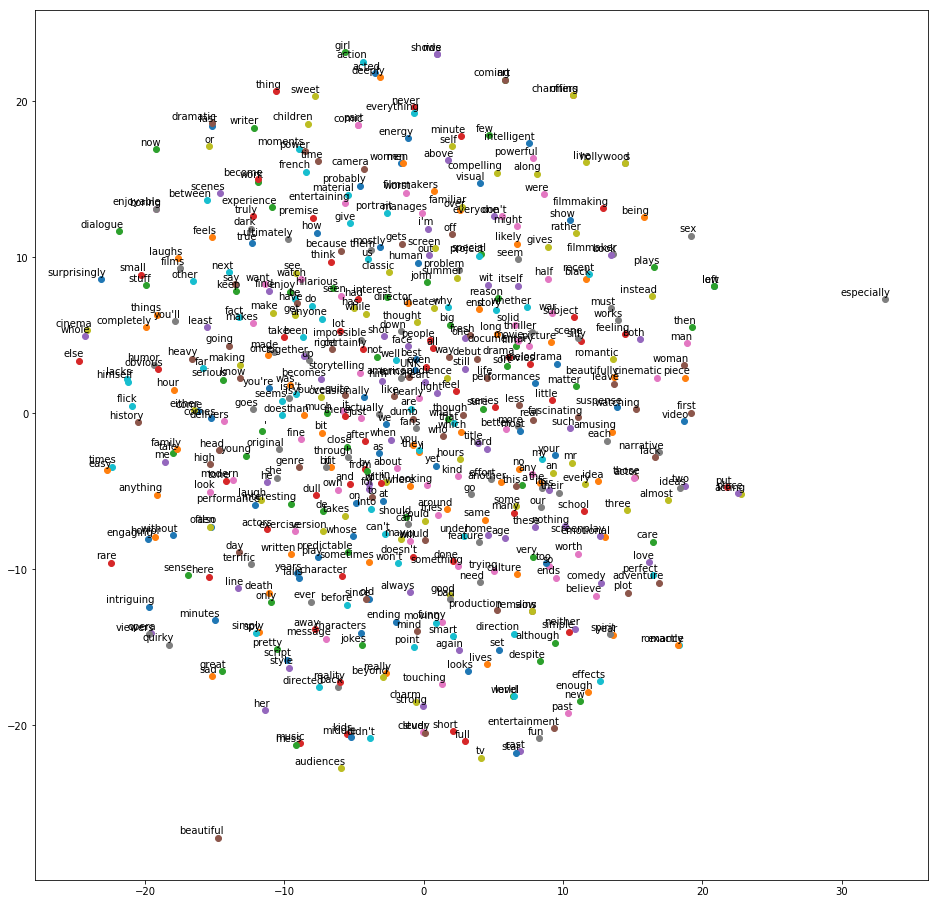

In [34]:
def plot_with_labels(low_dim_embs, labels):
  plt.figure(figsize=(16, 16))
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')


tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000, method='exact')
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
labels = [reverse_dictionary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

In [28]:
def doc2vec():
    vec = []
    for doc in corpus:
        vec_sum = np.zeros([embedding_size])
        for word in doc:
            if word not in dictionary:
                word = "UNK"
            vec_sum += final_embeddings[dictionary[word]]
        vec.append(vec_sum)
    return np.array(vec)


In [30]:
X = doc2vec()
y = np.array([0]*5331 + [1]*5331)
print(X.shape, y.shape)

(10662, 512) (10662,)
